In [14]:
!pip install face_recognition

In [15]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle,Circle
import numpy as np
import cv2
%matplotlib inline

In [47]:
image1 = cv2.imread("/content/sample_data/nik.jpg")
image1 =cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)

image2 = cv2.imread("/content/sample_data/pari.jpg")
image2 =cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

image3 = cv2.imread("/content/sample_data/pri.jpg")
image3 =cv2.cvtColor(image3,cv2.COLOR_BGR2RGB)

In [48]:
image1_encoding = face_recognition.face_encodings(image1)[0]
image2_encoding = face_recognition.face_encodings(image2)[0]
image3_encoding = face_recognition.face_encodings(image3)[0]

known_face_encodings=[image1_encoding,image2_encoding,image3_encoding]
known_face_names =["Nick Jonas","Parineeti Chopra","Priyanka Chopra"]

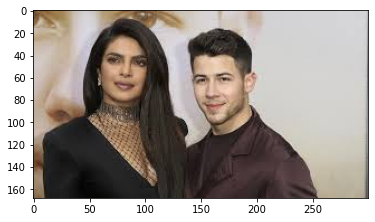

In [49]:
#load the test image
test_image1 =cv2.imread("/content/sample_data/pri_nik.jpg")
test_image1 =cv2.cvtColor(test_image1,cv2.COLOR_BGR2RGB)
plt.imshow(test_image1)

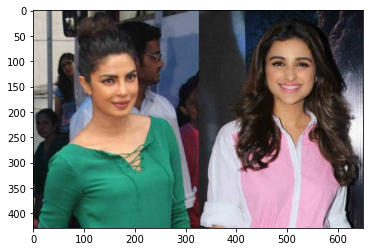

In [77]:
test_image2 =cv2.imread("/content/sample_data/Priyanka-Parineeti.jpg")
test_image2 =cv2.cvtColor(test_image2,cv2.COLOR_BGR2RGB)
plt.imshow(test_image2)

In [82]:
from PIL import Image, ImageDraw
from matplotlib.pyplot import imshow
import numpy as np

%matplotlib inline
def check(img_path):
  test_image =cv2.imread(img_path)
  test_image =cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)
  
  face_location=face_recognition.face_locations(test_image)
  face_encodings = face_recognition.face_encodings(test_image, face_location)

  pil_image = Image.fromarray(test_image)
  draw = ImageDraw.Draw(pil_image)

  for (top,right,bottom,left), face_encodings in zip(face_location,face_encodings):
    matches = face_recognition.compare_faces(known_face_encodings,face_encodings)

    name = "Unknown"

    if True in matches:
      match_first_index =matches.index(True)
      name =known_face_names[match_first_index]

    draw.rectangle(((left,top),(right,bottom)),outline =(0,0,0))
    text_width,text_height= draw.textsize(name)
    draw.rectangle(((left,bottom-text_height+10),(right,bottom)),fill=(0,0,0),outline=(0,0,0))
    draw.text((left,bottom+text_height),name,fill =(255,255,255,255))

  del draw
  return np.asarray(pil_image)

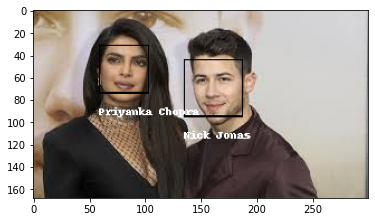

In [83]:
imshow(check("/content/sample_data/pri_nik.jpg"))

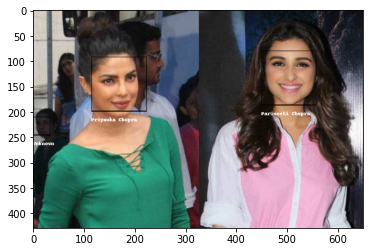

In [84]:
imshow(check("/content/sample_data/Priyanka-Parineeti.jpg"))